# Turing Machine and Deep Learning

## Assignment 1: Preliminaries

This notebook is meant for you to review some mathematics to help your intuition when dealing with more complex models, and some hands on practice with `numpy` and `matplotlib` to review some programming skills. It also introduces you to some common ML lingo. This notebook must be in your GitHub directory by the deadline mentioned on Canvas.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a GitHub repository (this will be where you submit *all* homework assignments). Share the public link to this repository with us via
2. Create a folder called "Week 1" and copy this notebook and any other files or data that may be needed.
3. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Grading is based on effort and you can either obtain a pass or fail for the assignment.

## Question 1.1 -- Regression as minimization

Derive the closed form solution for ***a*** in a 1-dimensional linear regression as states as an optimization (minimization) problem. You may upload a handwritten scan/photograph, a screenshot of a text editor, or LaTeX notation directly.

- *Given*: $n$ input-output pairs of the form $$(x_i, y_i)$$
- *To find*: The coefficients of the line of best fit $$\hat{y_i} = a+bx_i$$
- *Loss function*: The sum of squared errors: $$f(Y, \hat{Y})=\sum_{i=0}^{n}(y_i-\hat{y}_i)^2$$
- ***b*** is found by taking partial derivates with respect to ***b*** and setting it to zero. This gives $$ b = \frac{\sum_{i=0}^{n}(x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=0}^{n}(x_i - \bar{x})^2} $$
Note that in general, loss functions are the distance function *averaged over all data points in the set*. For now, you can ignore this point.

*Hint: Treat this as a regular minimization problem. Find where the partial derivates are zero of the error are with respect to the variables you wish to find.*

L = Loss Function = ∑(yi - y_hat)^2 <=> ∑(yi - a -bxi)^2
dL/da = -2a∑(yi-a-bxi) = -2a∑yi + 2∑a^2 + 2ab∑xi = 0
<=> 2na^2 + 2ab∑xi - 2a∑yi = 0
-> (divide by 2an) <=> a + b(avg_x) - (avg_y) = 0
<=> a = (avg_y) - b(avg_x)





## Question 1.2 -- Function analysis

Is there only one unique solution for $a$ and $b$? Why/why not?

*Hint: Think of the shape of the loss function, a.k.a. the 'loss landscape'.*


```

Yes given that specific sample of n observations (xi,yi), there is only one unique value for b (since it's the global minima of a quadratic function of errors - which has only one minima) and only one unique value for average of x and average of y and thus only one unique value for a.

Would the solutions for $a$ and $b$ be different if you used mean squared error instead of sum of squared errors? Why?

Yes this should yield the same a and b as any linear transformation to an objective function would still yield the same optimized value (minimum or maximum), and here dividing by n, which is a fixed integer just performs a simple linear transformation on the quadratic of errors (which is our loss function). So graphically, by dividing this quadratic by n, we would be stretching our quadratic function about it's minima (and the minima remains the same)

## Question 2.1 -- Function generation

Write a function that takes as input a list of floats $x_i$ to and outputs a list of the form:
$$y_i=sin(x_i)+\eta_i$$
where $\eta_i$ is normally sampled noise with a small standard deviation $\epsilon$:
$$\eta_i \sim \mathcal{N}(0, \epsilon)$$

Now, to see your work, plot it!
- Sample 20 equally-spaced points from the range $x\in [0,\pi/4]$ (cf. numpy's `linspace` function).
- Set $\epsilon=0.1$
- Sample y-values from your function using the noisy formula above.
- Plot this as a scatter plot.
- For reference, plot the function $y_i=sin(x_i)$ (no noise).
- Don't forget to add labels, a legend and other information.
- Optional Tip: Set a random seed (np.random.seed) to ensure reproducability of your results.

---


Your results should look something like this:
![image.png](attachment:image.png)

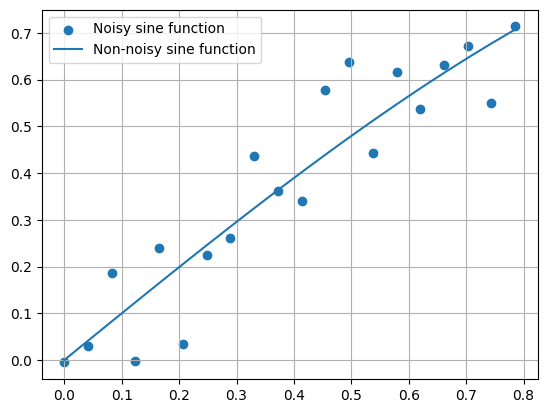

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(0)

def generate_sin(x, epsilon):
    func = []
    for i in x :
      func.append(np.sin(i) + generate_noise(epsilon))
    return func


# TODO: create noisy function
def generate_noise(epsilon):
  noise = np.random.normal(loc = 0, scale = epsilon)
  return noise

x = np.linspace(0, np.pi/4, 20)
y = generate_sin(x, 0.1)

# TODO: create true function
x_pure = np.linspace(0, np.pi/4, 20)
y_pure = generate_sin(x, 0)

np.random.seed(21)

# TODO: plot data, line
plt.scatter(x,y, label='Noisy sine function')
plt.plot(x_pure, y_pure, label='Non-noisy sine function')
plt.grid()
plt.legend()
plt.show()

## Question 2.2 -- Implementation of Linear Regression

Write a function that takes as input a list of $(x,y)$ pairs and returns the coefficients and residuals for a linear regression. Specifically, use the formula for $a$ and $b$ you found in Question 1.1.

*Hint: It may be better to create a new function that computes the sum of squared errors separately, taking $a$, $b$, and the $(x,y)$ pairs as inputs, and outputting a single float value.*

Compute and plot the line of best fit, along with the data and true function as you did above. Also print out the coefficients and the residuals (sum of square errors). How does this line compare to the true function?

---

You should get something similar to this:

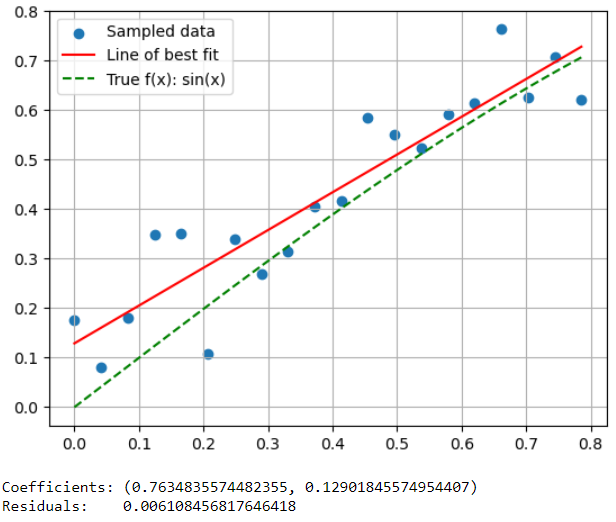

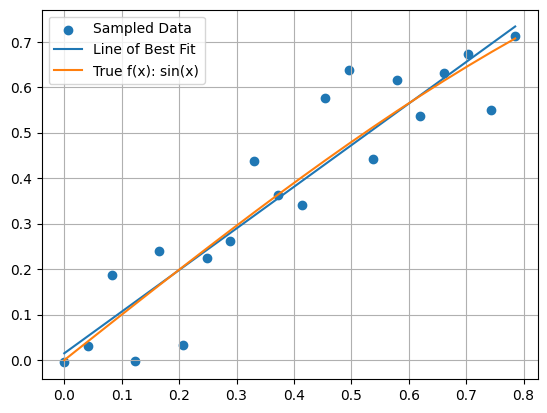

Coefficients: (0.015001797127704719, 0.9147715813710926)
Residuals:    0.013791693856269533


In [55]:
def compute_sos(y_true, y_pred):
  sum = 0
  for i in range(len(y_true)) :
      sum += (y_true[i] - y_pred[i])**2
  return sum

def lin_reg(x, y):
    avg_x = sum(x) / len(x)
    avg_y = sum(y) / len(y)
    slope_num = 0
    slope_den = 0
    for i in range(len(x)) :
      slope_num += (x[i] - avg_x) * (y[i] - avg_y)
    for i in range(len(y)) :
      slope_den += (x[i] - avg_x)**2
    b = slope_num/slope_den
    a = avg_y - (b*avg_x)
    y_pred = []
    for i in range(len(y)) :
      x = a + (b*y[i])
      y_pred.append(x)
    res = compute_sos(y, y_pred)
    return a, b, res

# TODO: generate line of best fit

a, b, res = lin_reg(x,y)
y_best = b*x+a


# TODO: plot line of best fit, data, etc
plt.scatter(x,y, label = 'Sampled Data')
plt.plot(x,y_best, label = 'Line of Best Fit')
plt.plot(x,np.sin(x), label = 'True f(x): sin(x)')

# make it pretty
plt.grid()
plt.legend()
plt.show()

print("Coefficients:", (a, b))
print("Residuals:   ", res)

## Question 2.3 -- Comparison to existing model

Use numpy's `polyfit` functions to get the coefficients and residuals of the same data points. Plot a line using these coefficients, and plot the sampled data, your previous line of best fit, and the true function, as before, for reference. How does this compare to the function you derived for $a$ and $b$? Print out the values for $a$, $b$ and the residuals to compare them. What does this tell you about the way `polyfit` is implemented?

*Tip: Use a dashed/dotted line for the new function to make the comparison easier.*

*General tip: Don't overwrite your previous variables!*

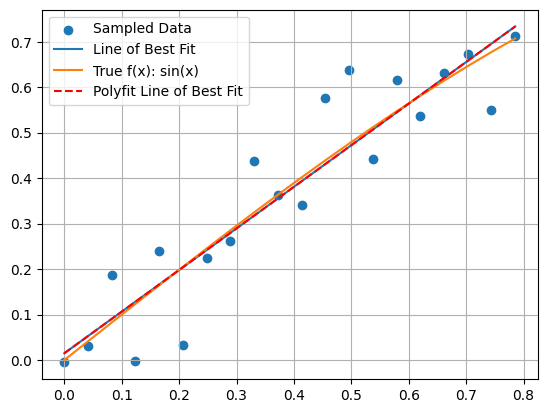

Coefficients:      (0.015001797127704719, 0.9147715813710926)
Residuals:         0.013791693856269533
Coefficients (np): (0.015001797127704723, 0.9147715813710927)
Residuals (np):    0.013791693856269533


In [56]:
# TODO: use np polyfit here
b_np, a_np = np.polyfit(x,y,1)
y_best_np = a_np + b_np*x
y_pred_np = []
for i in range(len(y)) :
  z = a + (b*y[i])
  y_pred_np.append(z)
res_np = compute_sos(y, y_pred_np)


# TODO: plot everything you need to
plt.scatter(x,y, label = 'Sampled Data')
plt.plot(x,y_best, label = 'Line of Best Fit')
plt.plot(x,np.sin(x), label = 'True f(x): sin(x)')
plt.plot(x,y_best_np, 'r--',label = 'Polyfit Line of Best Fit')
plt.grid()
plt.legend()
plt.show()
# print results
print("Coefficients:     ", (a, b))
print("Residuals:        ", res)
print("Coefficients (np):", (a_np, b_np))
print("Residuals (np):   ", res_np)

Here we get the exact same coefficients and residuals as from our implementation of OLS from scratch, basically implying that every predicted value from the np.polyfit function with degree set to 1 coincides with that from our implementation of OLS from scratch. So the np.polyfit function with degree set to 1 minimizes sum of squares to get it's coefficients as well (so it basically implements an OLS regression)

## Question 3 -- Test vs train loss

The mean of the residuals you computed above are often called the *training loss* or *training error* in machine learning lingo. In general, this phrase translates to the loss (difference between observed and predicted $y$ values in whatever metric you wish) over all data points available for you to train on (your *train/train set*). In our case, the 'metric' is the function you minimized, i.e. sum of squared errors.

In real life, you generally do not generate these data points -- you observe them from your experiments. However, you would want for your model to perform well on points that were *not* used to train your model as well -- this is called *generalization*. Thus, to test this, we use a *test set* -- a series of new observations. This will become important in following weeks when we use more complex models.

In general, we would want our test and train sets to have the same distributional properties, including the underlying function and the distribution of noise. Thus, for now, we *generate* a test set and see how our models 'perform' on it (again, we generally do not have access to the underlying function to generate datapoints with, we observe them through experiments). We compute the *test loss* or *test error* using the same metric as the training error (i.e. sum of square errors in this case).

Thus, for this exercise:
- Generate a new set of x-values in the range of $x\in[0,\pi/4]$. Compute a series of y-values using your `generate_sin` function, using the same $\epsilon$ and $n$ as before.
- Rewrite the function that computes the residuals to now compute the *mean* of the residuals. Thus, our loss function is the Mean Squared Error:
$$MSE = \frac{1}{N} \sum_{i=0}^{n}(y_i-\hat{y_i})^2$$
- Make a scatter plot of the train set and test set, and plot the two lines of best fit and the true function computed earlier on the train set. Don't forget labels. Does this seem to be of a similar distribution of the train set?
- Compute and print out the training and test losses.

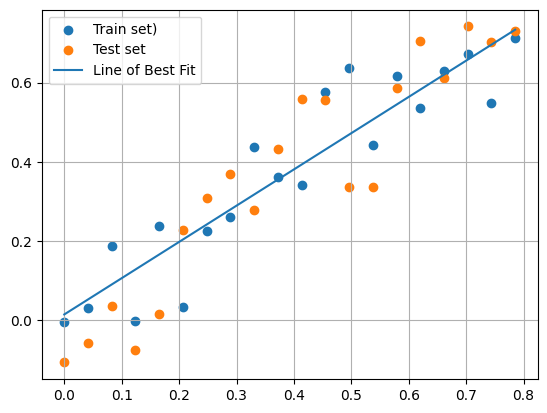

Coefficients:  (0.015001797127704719, 0.9147715813710926)
Train loss:    0.008101606212994253
Test loss:     0.011387981980986573


In [58]:
def compute_mse(y_true, y_pred, a, b):
  sum = 0
  for i in range(len(y_true)) :
      sum += (y_true[i] - y_pred[i])**2
  mse = sum/len(y_true)
  return mse

x_test = np.linspace(0, np.pi/4, 20)
y_test = generate_sin(x, 0.1)


plt.scatter(x, y, label="Train set)")
plt.scatter(x_test, y_test, label="Test set")

# TODO: plot data, lines of best fit, true function, make it pretty
plt.plot(x,y_best, label = 'Line of Best Fit')
plt.grid()
plt.legend()
plt.show()


test_loss = compute_mse(y_test, y_best, a, b)
train_loss = compute_mse(y, y_best, a, b)

print("Coefficients: ", (a, b))
print("Train loss:   ", train_loss)
print("Test loss:    ", test_loss)

Which of the two losses *should* be better? Which is actually better? Why?

In reality you'd want generalization error to be as low as possible since that's what truly determines the effectiveness of your model. Here and in general the training set's loss is lower as we optimize our loss function with respect to our coefficients via our training set not the test set

## Question 4 -- Ablation study of sampling

Try out different values of $n$ and $\epsilon$. How does each one affect the performance of your linear models? (report your steps and general observations both for the train and test sets).

To answer this question I adjust all n = 20 in previous code sections to n = 100 and n = 1000 (now reverted back to 20) and simarly with ϵ = 0.1 and ϵ = 0.5 and ϵ = 0.8.

As n increases, the variance of the coefficients we get via OLS decreases i.e. the standard errors decrease which is why our test set error decreases too.

As ϵ increases, the test set error increases.


## Question 5.1 -- More data

Generate a training and test set using the `generate_sin` function you defined, but in the range $x\in[0,2\pi]$, $n=20$ and $\epsilon=0.2$. Plot the train and test sets (scatter plots) and true function in one plot.

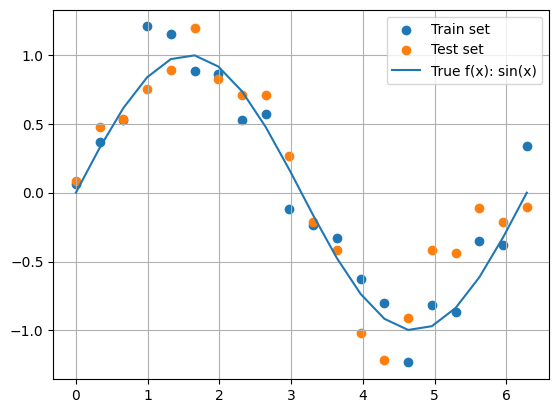

In [59]:
# TODO: generate new data and plot
n_samples = 20
x = np.linspace(0, np.pi*2, 20)
y_train = generate_sin(x, 0.2)
y_test = generate_sin(x, 0.2)

x_pure = np.linspace(0, np.pi*2, 20)
y_pure = generate_sin(x, 0)

plt.scatter(x, y_train, label="Train set")
plt.scatter(x, y_test, label="Test set")

plt.plot(x_pure, y_pure, label="True f(x): sin(x)")
plt.grid()
plt.legend()
plt.show()

## Question 5.2 -- Polynomial fitting

Now, we examine the flexibility of the model we use and the performance on the training and test sets. 'Flexibility' is generally ill-defined, but intuitively, *a learning algorithm $A$ is more flexible than another learning algorithm $B$ if $A$ can fit its computed models $\hat{f}$ more closely to the training data than $B$ can do.* (quote from Jaeger, 2022, pg 11). For example, a quadratic function is more flexible (in theory) than a linear one, since a quadratic function can model data *at least* as well as linear ones. Specifically, the set of all linear functions is a subset of quadratic ones (by setting the quadratic coefficient to zero).

- Using the datapoints you made above with $x\in[0,2\pi]$, compute the best fitting polynomials from degrees $d\in\{1,...,20\}$.
- Save the corresponding train and test losses, and the resulting coefficients. Don't forget to change the function that computes the mean squared errors if required (perhaps `np.polyval` may help here?). Also, don't forget to create your model based _only_ on your train set.

In [60]:
coefficients_1 = np.polyfit(x, y_train, 1)
coefficients_2 = np.polyfit(x, y_train, 2)
coefficients_3 = np.polyfit(x, y_train, 3)
coefficients_4 = np.polyfit(x, y_train, 4)
coefficients_5 = np.polyfit(x, y_train, 5)
coefficients_6 = np.polyfit(x, y_train, 6)
coefficients_7 = np.polyfit(x, y_train, 7)
coefficients_8 = np.polyfit(x, y_train, 8)
coefficients_9 = np.polyfit(x, y_train, 9)
coefficients_10 = np.polyfit(x, y_train, 10)
coefficients_11 = np.polyfit(x, y_train, 11)
coefficients_12 = np.polyfit(x, y_train, 12)
coefficients_13 = np.polyfit(x, y_train, 13)
coefficients_14 = np.polyfit(x, y_train, 14)
coefficients_15 = np.polyfit(x, y_train, 15)
coefficients_16 = np.polyfit(x, y_train, 16)
coefficients_17 = np.polyfit(x, y_train, 17)
coefficients_18 = np.polyfit(x, y_train, 18)
coefficients_19 = np.polyfit(x, y_train, 19)
coefficients_20 = np.polyfit(x, y_train, 20)

y_pred_1 = np.polyval(coefficients_1, x)
y_pred_2 = np.polyval(coefficients_2, x)
y_pred_3 = np.polyval(coefficients_3, x)
y_pred_4 = np.polyval(coefficients_4, x)
y_pred_5 = np.polyval(coefficients_5, x)
y_pred_6 = np.polyval(coefficients_6, x)
y_pred_7 = np.polyval(coefficients_7, x)
y_pred_8 = np.polyval(coefficients_8, x)
y_pred_9 = np.polyval(coefficients_9, x)
y_pred_10 = np.polyval(coefficients_10, x)
y_pred_11 = np.polyval(coefficients_11, x)
y_pred_12 = np.polyval(coefficients_12, x)
y_pred_13 = np.polyval(coefficients_13, x)
y_pred_14 = np.polyval(coefficients_14, x)
y_pred_15 = np.polyval(coefficients_15, x)
y_pred_16 = np.polyval(coefficients_16, x)
y_pred_17 = np.polyval(coefficients_17, x)
y_pred_18 = np.polyval(coefficients_18, x)
y_pred_19 = np.polyval(coefficients_19, x)
y_pred_20 = np.polyval(coefficients_20, x)

train_loss_1 = compute_mse(y, y_pred_1, a, b)
train_loss_2 = compute_mse(y, y_pred_2, a, b)
train_loss_3 = compute_mse(y, y_pred_3, a, b)
train_loss_4 = compute_mse(y, y_pred_4, a, b)
train_loss_5 = compute_mse(y, y_pred_5, a, b)
train_loss_6 = compute_mse(y, y_pred_6, a, b)
train_loss_7 = compute_mse(y, y_pred_7, a, b)
train_loss_8 = compute_mse(y, y_pred_8, a, b)
train_loss_9 = compute_mse(y, y_pred_9, a, b)
train_loss_10 = compute_mse(y, y_pred_10, a, b)
train_loss_11 = compute_mse(y, y_pred_11, a, b)
train_loss_12 = compute_mse(y, y_pred_12, a, b)
train_loss_13 = compute_mse(y, y_pred_13, a, b)
train_loss_14 = compute_mse(y, y_pred_14, a, b)
train_loss_15 = compute_mse(y, y_pred_15, a, b)
train_loss_16 = compute_mse(y, y_pred_16, a, b)
train_loss_17 = compute_mse(y, y_pred_17, a, b)
train_loss_18 = compute_mse(y, y_pred_18, a, b)
train_loss_19 = compute_mse(y, y_pred_19, a, b)
train_loss_20 = compute_mse(y, y_pred_20, a, b)


test_loss_1 = compute_mse(y_test, y_pred_1, a, b)
test_loss_2 = compute_mse(y_test, y_pred_2, a, b)
test_loss_3 = compute_mse(y_test, y_pred_3, a, b)
test_loss_4 = compute_mse(y_test, y_pred_4, a, b)
test_loss_5 = compute_mse(y_test, y_pred_5, a, b)
test_loss_6 = compute_mse(y_test, y_pred_6, a, b)
test_loss_7 = compute_mse(y_test, y_pred_7, a, b)
test_loss_8 = compute_mse(y_test, y_pred_8, a, b)
test_loss_9 = compute_mse(y_test, y_pred_9, a, b)
test_loss_10 = compute_mse(y_test, y_pred_10, a, b)
test_loss_11 = compute_mse(y_test, y_pred_11, a, b)
test_loss_12 = compute_mse(y_test, y_pred_12, a, b)
test_loss_13 = compute_mse(y_test, y_pred_13, a, b)
test_loss_14 = compute_mse(y_test, y_pred_14, a, b)
test_loss_15 = compute_mse(y_test, y_pred_15, a, b)
test_loss_16 = compute_mse(y_test, y_pred_16, a, b)
test_loss_17 = compute_mse(y_test, y_pred_17, a, b)
test_loss_18 = compute_mse(y_test, y_pred_18, a, b)
test_loss_19 = compute_mse(y_test, y_pred_19, a, b)
test_loss_20 = compute_mse(y_test, y_pred_20, a, b)


<ipython-input-60-2fe65bf13be9>:18: RankWarning: Polyfit may be poorly conditioned
  coefficients_18 = np.polyfit(x, y_train, 18)
<ipython-input-60-2fe65bf13be9>:19: RankWarning: Polyfit may be poorly conditioned
  coefficients_19 = np.polyfit(x, y_train, 19)
<ipython-input-60-2fe65bf13be9>:20: RankWarning: Polyfit may be poorly conditioned
  coefficients_20 = np.polyfit(x, y_train, 20)


**Bonus**: You may encounter this warning (if you don't, try increasing the range of polynomial degrees):

`RankWarning: Polyfit may be poorly conditioned`

What does this mean?

It means that np.polyfit had some issues is computing polynomial coefficients for the data at hand, this may be because we have a small sample set of 20 observations and try to fit very high degree polynomials to these data points

## Question 5.3 -- Analysis
Plot the lines of best fit for $d=\{1,2,3,5,10,20\}$. These should look like the plots shown in Lecture 1 under section *Polynomial Regression*. You may also show this in multiple plots as long as you have the reference plots for each (the train and test data and the true underlying function).

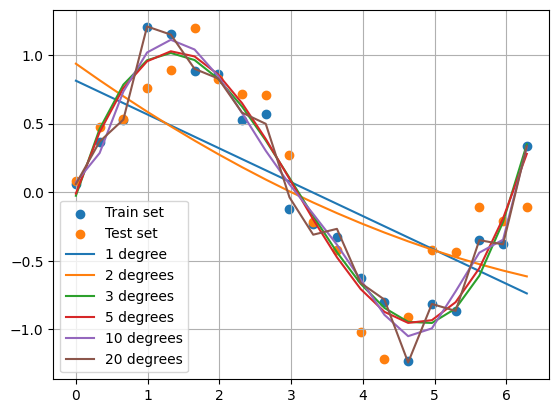

In [61]:
plt.scatter(x, y_train, label="Train set")
plt.scatter(x, y_test, label="Test set")
plt.plot(x, y_pred_1, label = "1 degree")
plt.plot(x, y_pred_2, label = "2 degrees")
plt.plot(x, y_pred_3, label = "3 degrees")
plt.plot(x, y_pred_5, label = "5 degrees")
plt.plot(x, y_pred_10, label = "10 degrees")
plt.plot(x, y_pred_20, label = "20 degrees")
plt.grid()
plt.legend()
plt.show()

Now plot the MSE losses versus the flexibility (degree of the best fitting functions) for both the test and train sets. Again, a similar plot can be found in Lecture 1 under *Overfitting and Underfitting*.

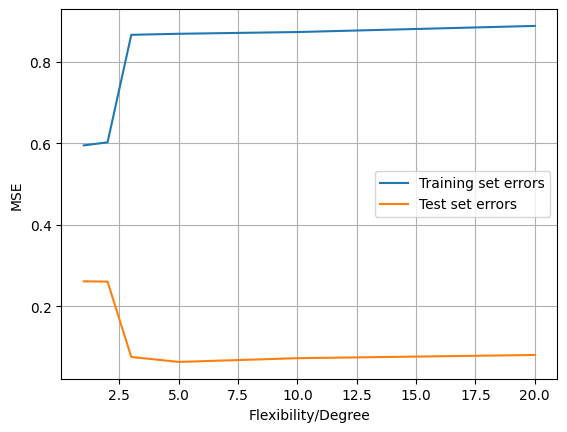

In [62]:
x_values = [1,2,3,5,10,20]
y_values_train = [train_loss_1,train_loss_2,train_loss_3,train_loss_5,train_loss_10,train_loss_20]
y_values_test = [test_loss_1,test_loss_2,test_loss_3,test_loss_5,test_loss_10,test_loss_20]
plt.plot(x_values, y_values_train, label = 'Training set errors')
plt.plot(x_values, y_values_test, label = 'Test set errors')
plt.xlabel('Flexibility/Degree')
plt.ylabel('MSE')
plt.grid()
plt.legend()
plt.show()

## Open Questions (Question 6)
1. Where do the polynomial models start to overfit? How can you tell?
2. What model fits the best to the training data? What model fits the best to the underlying function (visually, according to your intuition about the plots)? Are they the same?
4. Try increasing the number of training points to $n=200$. At what point does overfitting start now?
5. In general, does increasing the number of training points always allow for more flexible models of the real world? Why/why not?

For this answer I refer to the diagram from the lecture where relevant as my plot is clearly wrong given that the test lost is always lower than the training loss, which is extremely unlikely.

1. According to the plot in the lecture overfitting starts to occur after degree 4 where the training and test errors diverge as the model becomes too well fit to the training set at that point and the test error suffers as a result
2. According to my plot in 5.3, degree of 3 is the best fit in this instance as it closely imitates the shape of the true function without fitting to each point and/or losing it's true smooth shape due to an unecessarily high degree of flexibility as seen in d = 10 and d = 20
3. Unable to answer as my plot for 5.3 b) is wrong
4. More training points prevent polynomial functions, especially those of higher degrees, from fitting themselves to exact values of the training set i.e. overfitting and so can improve flexibility in that manner